# 1. Import libraries & setup

In [275]:
!python --version

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import cycle

pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal=plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle=cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

Python 3.8.3


# 2. Datasets

**Below files are available**
- calendar.csv - Contains information about the dates on which the products are sold.
- sales_train_validation.csv - Contains the historical daily unit sales data per product and store [d_1 - d_1913]
- sample_submission.csv - The correct format for submissions. Reference the Evaluation tab for more info.
- sell_prices.csv - Contains information about the price of the products sold per store and date.
- sales_train_evaluation.csv - Includes sales [d_1 - d_1941] 

## 2.1. Data Loading

In [276]:
sales=pd.read_csv('sales_train_validation.csv')
cal=pd.read_csv('calendar.csv')
price=pd.read_csv('sell_prices.csv')

# 3. Exploratory Data Analysis (EDA)

## 3.1 Analyse given datasets

### 3.1.1. Describe the dataset

In [177]:
# print shape

print(sales.shape)
print(cal.shape)
print(price.shape)

(30490, 1919)
(1969, 14)
(6841121, 4)


In [178]:
# print column names in all 3 dataframes

print(sales.columns)
print(cal.columns)
print(price.columns)

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910',
       'd_1911', 'd_1912', 'd_1913'],
      dtype='object', length=1919)
Index(['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI'],
      dtype='object')
Index(['store_id', 'item_id', 'wm_yr_wk', 'sell_price'], dtype='object')


### 3.1.2. Look for unique values

In [179]:
# look for unique counts and values of main columns

print(f"There are {sales['cat_id'].nunique()} categories")

print(f"There are {sales['dept_id'].nunique()} departments")
print(f"There are {sales['state_id'].nunique()} unique states")
print(f"There are {sales['store_id'].nunique()} stores")
print(f"There are {sales['item_id'].nunique()} items")

print(f"unique states are: {sales.state_id.unique()}")
print(f"unique store ids are: {sales.store_id.unique()}")
print(f"unique category IDs are: {sales.cat_id.unique()}")
print(f"unique department IDs are: {sales.dept_id.unique()}")


There are 3 categories
There are 7 departments
There are 3 unique states
There are 10 stores
There are 3049 items
unique states are: ['CA' 'TX' 'WI']
unique store ids are: ['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']
unique category IDs are: ['HOBBIES' 'HOUSEHOLD' 'FOODS']
unique department IDs are: ['HOBBIES_1' 'HOBBIES_2' 'HOUSEHOLD_1' 'HOUSEHOLD_2' 'FOODS_1' 'FOODS_2'
 'FOODS_3']


### 3.1.3. Look for NA values

In [180]:
#Checking for any na values
print(sales.isna().sum())
print("---------------------------------------------------------")
print(cal.isna().sum())
print("---------------------------------------------------------")
print(price.isna().sum())

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1909      0
d_1910      0
d_1911      0
d_1912      0
d_1913      0
Length: 1919, dtype: int64
---------------------------------------------------------
date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64
---------------------------------------------------------
store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64


**Observations about datasets:**

In the data, there are 3 states, 10 stores, 3 categories, 7 departments, and 3049 items.

- States are (CA, TX, WI)
- 10 stores are:
    - 4 in CA: (CA_1, CA_2, CA_3, CA_4) 
    - 3 stores in TX: (TX_1, TX_2, TX_3)
    - 3 stores in WI: (WI_1, WI_2, WI_3)
- 3 Categories are:
     - HOBBIES, 
     - HOUSEHOLD, 
     - FOODS
- Departments are:
    - HOBBIES:'HOBBIES_1', 'HOBBIES_2', 
    - HOUSEHOLD:'HOUSEHOLD_1', 'HOUSEHOLD_2', 
    - FOOD:'FOODS_1','FOODS_2','FOODS_3'
    
- Null Values:
    - There are null values in calendar dataset under event_name and event_type categories.

## 3.2. Data Visualization

### 3.2.1. Visualizing the distribution of items

In [181]:
import plotly.express as px
gp = sales.groupby(['state_id','store_id','cat_id','dept_id'],as_index=False)
gp = gp['item_id'].count().dropna()
gp['USA'] = 'USA'

fig = px.treemap(gp, path=['USA', 'state_id', 'store_id', 'cat_id', 'dept_id'], values='item_id',
                  color='item_id',
                  color_continuous_scale = 'RdBu',
                  title='Walmart: Distribution of items')
            
fig.update_layout(treemapcolorway = ["pink", "lightgray"])
fig.show()

## 3.3. EDA on Sales dataset

In [182]:
# print first 5 rows of sales dataset
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


In [183]:
total_items = sales['state_id'].value_counts()
total_items 

CA    12196
TX     9147
WI     9147
Name: state_id, dtype: int64

In [184]:
sales['item_total']=sales.iloc[:,6:1947].sum(axis=1)

In [185]:
total_state = sales.groupby(['state_id'])['item_total'].sum()
total_cat = sales.groupby(['cat_id'])['item_total'].sum()
total_cat_by_state = sales.groupby(['state_id','cat_id'])['item_total'].sum()
total_store_by_state = sales.groupby(['store_id','state_id'])['item_total'].sum()

### 3.3.1. Visualize Sales data

(array([0, 1, 2]), [Text(0, 0, 'CA'), Text(1, 0, 'TX'), Text(2, 0, 'WI')])

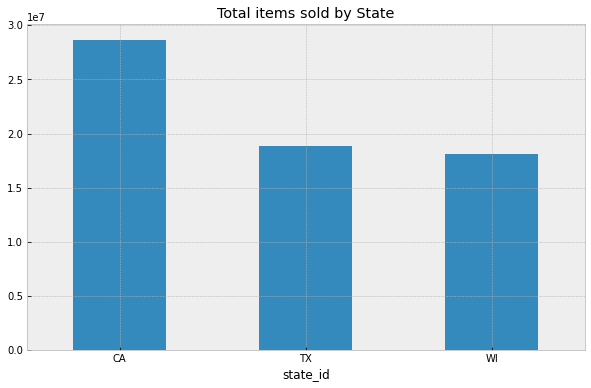

In [186]:
import matplotlib.pyplot as plt
#total_state.plot(kind='bar')
#create bar plot with custom aesthetics
total_state.plot(kind='bar', title='Total items sold by State', figsize=(10, 6))

#rotate x-axis ticks vertically
plt.xticks(rotation=0)

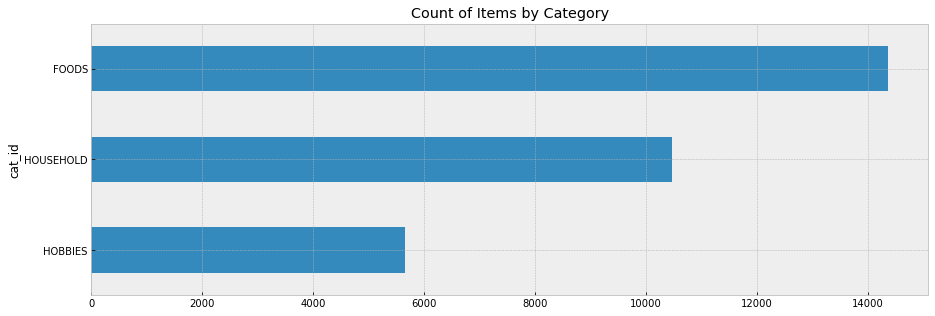

In [187]:
# Sales over time by category type
sales.groupby('cat_id').count()['id'].sort_values().plot(kind='barh', title='Count of Items by Category', figsize=(15,5))
plt.show()


**Observations:**

- FOODS category has the highest number of items.
- The number of items in descending order are FOODs, HOUSEHOLD, and HOBBIES.

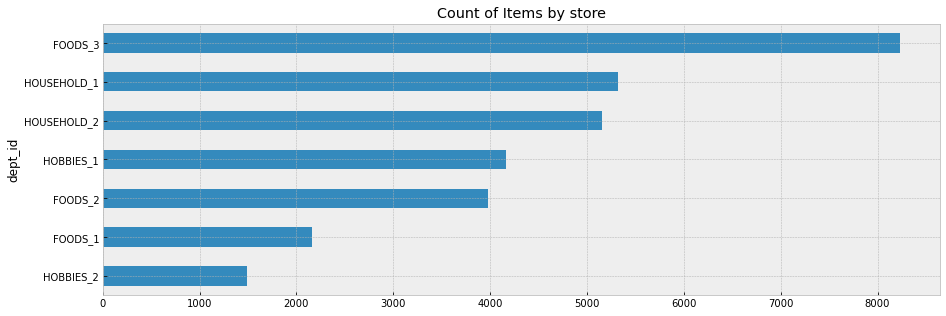

In [188]:
# Sales over time by store ID
sales.groupby('dept_id').count()['id'].sort_values().plot(kind='barh', title='Count of Items by store', figsize=(15,5))
plt.show()


*From above analysis, it can be seen that the most frequent item that sells is:*

- Category: Food
- State: California
- Department: Foods_3
    

<AxesSubplot:title={'center':'total items sold by state and category'}, xlabel='state_id,cat_id'>

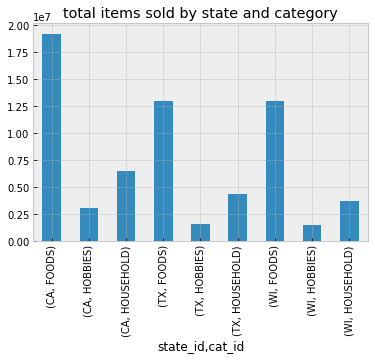

In [189]:
sales.groupby(['state_id','cat_id'])['item_total'].sum().plot.bar(title='total items sold by state and category')


<AxesSubplot:title={'center':'Total items sold by Stores'}, xlabel='store_id,state_id'>

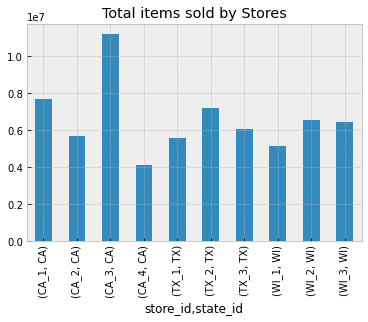

In [190]:
sales.groupby(['store_id','state_id'])['item_total'].sum().plot.bar(title='Total items sold by Stores')


### 3.3.2. Visualize data for a single item that sells frequently

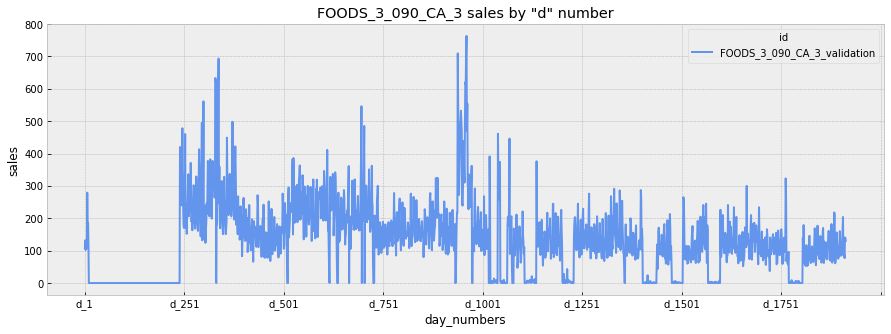

In [191]:
d_cols=[c for c in sales.columns if 'd_' in c]

# chaining the following operations below:
# 1. Select a particular item
# 2. Set id as index, & keep only sales data column starting with d_
# 3. Transpose so that dataframe is a column
# 4. Plot the data
sales.loc[sales['id']=='FOODS_3_090_CA_3_validation'] \
.set_index('id')[d_cols] \
.T \
.plot(figsize=(15,5), title='FOODS_3_090_CA_3 sales by "d" number', xlabel='day_numbers', ylabel='sales', color='cornflowerblue')
plt.show()

**Observations**

- The sales curve is very inconsistent, which implies that there are so many factors that affect the sales on a given day.
- For some days the sales curve is flatline which means the item is unavailable.
- Item is unavailable for many number of days

### EDA of sells price data

In [192]:
price.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [193]:
# Add a category column to price data 
price['Category'] = price['item_id'].apply(lambda x: x.split('_')[0])

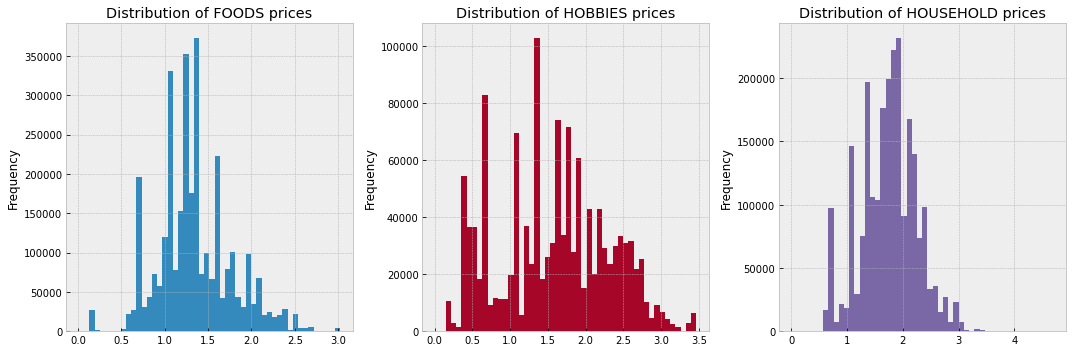

In [194]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
ax_id=0

for cat, d in price.groupby('Category'):
    # Do the log of values of sell_price columns & plot it's histogram distribution
    d['sell_price'].apply(np.log1p).plot(kind='hist', bins=50,ax=axs[ax_id], color=next(color_cycle), title=f"Distribution of {cat} prices")
    ax_id+=1
        
plt.tight_layout()
plt.show()

### EDA of Calendar data

In [195]:
cal.shape

(1969, 14)

In [196]:
print(cal['event_name_1'].count())
print(cal['event_name_2'].count())
print(cal['event_type_1'].count())
print(cal['event_type_2'].count())

162
5
162
5


In [197]:
#print unique counts of events and event names:

print("unique count of event_names_1:", cal['event_name_1'].nunique())
print("unique events of event_names_1:", cal['event_name_1'].unique())
print('------------------------------------------------------')
print("unique count of event_names_2:", cal['event_name_2'].nunique())
print("unique events of event_names_2:",cal['event_name_2'].unique())
print('------------------------------------------------------')
print("unique count of event_type_1:", cal['event_type_1'].nunique())
print("unique events of event_type_1:", cal['event_type_1'].unique())
print('------------------------------------------------------')
print("unique count of event_type_2:", cal['event_type_2'].nunique())
print("unique events of event_type_2:", cal['event_type_2'].unique())

unique count of event_names_1: 30
unique events of event_names_1: [nan 'SuperBowl' 'ValentinesDay' 'PresidentsDay' 'LentStart' 'LentWeek2'
 'StPatricksDay' 'Purim End' 'OrthodoxEaster' 'Pesach End' 'Cinco De Mayo'
 "Mother's day" 'MemorialDay' 'NBAFinalsStart' 'NBAFinalsEnd'
 "Father's day" 'IndependenceDay' 'Ramadan starts' 'Eid al-Fitr'
 'LaborDay' 'ColumbusDay' 'Halloween' 'EidAlAdha' 'VeteransDay'
 'Thanksgiving' 'Christmas' 'Chanukah End' 'NewYear' 'OrthodoxChristmas'
 'MartinLutherKingDay' 'Easter']
------------------------------------------------------
unique count of event_names_2: 4
unique events of event_names_2: [nan 'Easter' 'Cinco De Mayo' 'OrthodoxEaster' "Father's day"]
------------------------------------------------------
unique count of event_type_1: 4
unique events of event_type_1: [nan 'Sporting' 'Cultural' 'National' 'Religious']
------------------------------------------------------
unique count of event_type_2: 2
unique events of event_type_2: [nan 'Cultural' 'Re

In [198]:
# unique event names
en1=set(cal['event_name_1'])
en2=set(cal['event_name_2'])
print(len(en1.union(en2))-1)
print(en1.union(en2))

30
{nan, 'LaborDay', 'Chanukah End', 'VeteransDay', 'SuperBowl', 'OrthodoxChristmas', "Mother's day", 'Purim End', "Father's day", 'OrthodoxEaster', 'Easter', 'Pesach End', 'Thanksgiving', 'ValentinesDay', 'Eid al-Fitr', 'NBAFinalsStart', 'MartinLutherKingDay', 'EidAlAdha', 'NBAFinalsEnd', 'ColumbusDay', 'Cinco De Mayo', 'Halloween', 'NewYear', 'LentStart', 'PresidentsDay', 'IndependenceDay', 'StPatricksDay', 'Christmas', 'Ramadan starts', 'LentWeek2', 'MemorialDay'}


In [199]:
# unique event types
et1=set(cal['event_type_1'])
et2=set(cal['event_type_2'])
print(len(et1.union(et2))-1)
print(et1.union(et2))

4
{nan, 'National', 'Religious', 'Sporting', 'Cultural'}


**Observation**

- There are 30 unique events

- There are 4 unique event types

In [200]:
# finding not null values for determining event in the calendar dataset

In [201]:
en1=len(cal.loc[cal['event_name_1'].notnull()])
en2=len(cal.loc[cal['event_name_2'].notnull()])
print("total not null values in event_name_1 are" ,en1)
print("total not null values in event_name_2 are" ,en2)

total not null values in event_name_1 are 162
total not null values in event_name_2 are 5


In [202]:
cal.columns

Index(['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI'],
      dtype='object')

In [203]:
print(cal['snap_CA'].values)
#print(cal['snap_TX'])
#print(cal['snap_WI'])

[0 0 0 ... 0 0 0]


Observations from calendar data:
- SNAP follows a diiferent pattern in different state.
- SNAP is allowed on the first ten days in CA, it follows the pattern 101-011 in TX and follows the pattern 011 in WI.
- There are total 30 unique events which belong to 5 unique types.
- There are total 162 not null values in event_name_1 and 5 not null values in event_name_2 for approx 4.5 years, which results these events occur every year.

# Downcasting and reducing memory usage 

In [ ]:
# def reduce_mem_usage(df, verbose=True):
#     numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#     start_mem = df.memory_usage().sum() / 1024**2    
#     for col in df.columns:
#         col_type = df[col].dtypes
#         if col_type in numerics:
#             c_min = df[col].min()
#             c_max = df[col].max()
#             if str(col_type)[:3] == 'int':
#                 if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
#                     df[col] = df[col].astype(np.int8)
#                 elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
#                     df[col] = df[col].astype(np.int16)
#                 elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
#                     df[col] = df[col].astype(np.int32)
#                 elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
#                     df[col] = df[col].astype(np.int64)  
#             else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
#                     df[col] = df[col].astype(np.float32)
#                 else:
#                     df[col] = df[col].astype(np.float64)    
#     end_mem = df.memory_usage().sum() / 1024**2
#     if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
#     return df

In [285]:
def reduce_mem_usage(df, verbose=True):

    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()

    for i,t in enumerate(types):

        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)

        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)

        elif t == object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')
    return df  

In [286]:
sales_b_d=sales.memory_usage().sum()
sales_b_d=np.round(sales_b_d/(1024*1024),1)

cal_b_d=cal.memory_usage().sum()
cal_b_d=np.round(cal_b_d/(1024*1024),1)

price_b_d=price.memory_usage().sum()
price_b_d=np.round(price_b_d/(1024*1024),1)

In [287]:
sales = reduce_mem_usage(sales)
cal = reduce_mem_usage(cal)
price = reduce_mem_usage(price)


In [273]:
sales_a_d=sales.memory_usage().sum()
sales_a_d=np.round(sales_a_d/(1024*1024),1)

cal_a_d=cal.memory_usage().sum()
cal_a_d=np.round(cal_a_d/(1024*1024),1)

price_a_d=price.memory_usage().sum()
price_a_d=np.round(price_a_d/(1024*1024),1)

In [274]:
data = {'df':['sales','calendar','price'],
       'Before downcasting':[sales_b_d,cal_b_d,price_b_d],
       'After downcasting':[sales_a_d,cal_a_d,price_a_d]}

df = pd.DataFrame(data)
memory_decrease=(df["Before downcasting"]-df["After downcasting"])/df["Before downcasting"]
memory_decrease=memory_decrease*100

df["memory_decrease"] = memory_decrease
df

,df,Before downcasting,After downcasting,memory_decrease
0,sales,446.4,95.2,78.673835
1,calendar,0.2,0.1,50.000000
2,price,208.8,45.8,78.065134


## Data transformation and Merge Datasets

#### Since it is a time-series forecasting problem,

Let's follow below approach to process existing datasets into a supervised learning single dataset:
1) Convert wide data format to a long data format
2) Merge all the datasets ie. sales data, calendar data, and sell prices data to a single dataframe on “d_” (day number).

Once datasets are merged, handled the missing values as it comes from sell price data, through mean imputation techniques.

In [277]:
# Find categorical columns in all 3 dataframes
catcols_cal = cal.select_dtypes(include=['object']).columns.tolist()
print (catcols_cal)
catcols_price = price.select_dtypes(include=['object']).columns.tolist()
print(catcols_price)
catcols_sales=sales.select_dtypes(include=['object']).columns.tolist()
print(catcols_sales)

['date', 'weekday', 'd', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']
['store_id', 'item_id']
['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']


In [278]:
cal["date"] = pd.to_datetime(cal["date"])

In [279]:
# drop some calendar features
cal.drop(['weekday', 'wday', 'month', 'year'], inplace = True, axis = 1)

In [280]:
# melt the data
# Unpivot a DataFrame from wide to long format
# This function pd.melt() is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), 
#while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.

wide_to_long_dataframe = pd.melt(sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='d', value_name='sales')
wide_to_long_dataframe = wide_to_long_dataframe.dropna()



In [281]:
wide_to_long_dataframe = reduce_mem_usage(wide_to_long_dataframe)
wide_to_long_dataframe

<ipython-input-270-f987d85821a1>:26: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,id,item_id,dept_id,cat_id,store_id,state_id,d,sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
...,...,...,...,...,...,...,...,...
58327365,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1913,1
58327366,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1913,0
58327367,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1913,0
58327368,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1913,3


In [282]:
#merge all 3 datasets to a single dataframe on "d_" (day number)

final_df = pd.merge(wide_to_long_dataframe , cal, on='d', how='left')
final_df = pd.merge(final_df, price, on=['store_id','item_id','wm_yr_wk'], how='left')

final_df

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,NaN,NaN,0,0,0,NaN
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,NaN,NaN,0,0,0,NaN
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,NaN,NaN,0,0,0,NaN
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,NaN,NaN,0,0,0,NaN
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,NaN,NaN,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58327365,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1913,1,2016-04-24,11613,NaN,NaN,NaN,NaN,0,0,0,2.98
58327366,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1913,0,2016-04-24,11613,NaN,NaN,NaN,NaN,0,0,0,2.48
58327367,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1913,0,2016-04-24,11613,NaN,NaN,NaN,NaN,0,0,0,3.98
58327368,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1913,3,2016-04-24,11613,NaN,NaN,NaN,NaN,0,0,0,1.28


In [283]:
#fil the missing sell price values by mean imputaion
final_df["sell_price"].fillna(final_df.groupby("id")["sell_price"].transform("mean"), inplace=True)


In [284]:
final_df

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,NaN,NaN,0,0,0,8.280059
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,NaN,NaN,0,0,0,3.970000
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,NaN,NaN,0,0,0,2.970000
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,NaN,NaN,0,0,0,4.524824
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,NaN,NaN,0,0,0,2.942965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58327365,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1913,1,2016-04-24,11613,NaN,NaN,NaN,NaN,0,0,0,2.980000
58327366,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1913,0,2016-04-24,11613,NaN,NaN,NaN,NaN,0,0,0,2.480000
58327367,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1913,0,2016-04-24,11613,NaN,NaN,NaN,NaN,0,0,0,3.980000
58327368,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1913,3,2016-04-24,11613,NaN,NaN,NaN,NaN,0,0,0,1.280000
